<div style="background-color: lightblue; padding: 60px;">
    <h1><b>Time Series Anomaly Detector</b></h1>
</div>


Scenario: Discover anomalies in number of web pages accessed in a day by a user. Is there a bot copying the curriculum?

We can make examinations about outliers on a moving basis as we have previously with the consideration of 
time series. If we take the concept of a rolling average and extend this out with our understanding of z-scores,
we can construct the idea of moving bands across standard deviations, otherwise known as Bollanger Bands.
We will accomplish this by breaking down to the following tasks:

Acquire the data
Prepare the data
Make the analysis process (which we will discuss later) work over all users.
Turn the analysis process and calculations into a function that can be used to loop through for each user.
Test the function on a single user.
Analyze by looping over all users.
The analysis process will look like this, for each user:

Compute necessary metrics to arrive at the final metric, %b (percent-b).
Add user id to the dataframe that contains all the metrics, including %b.
Filter to rows where %b indicates anomaly (i.e. > 1)
Append rows of anomalies of new user to previous users' anomalous activity.
Finally, we will do a quick sample of exploration of the anomalies.

In [14]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# .py files
import env



# Exercises

Scenario: Discover anomalies in number of web pages accessed in a day by a user. Is there a bot copying the curriculum?



The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.



In [16]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'

query = '''
  SELECT date,
       path as endpoint,
       user_id,
       cohort_id,
       ip as source_ip
  FROM logs;
 '''
df0 = pd.read_sql(query, url)

In [19]:
df0.to_csv('cached_logs.csv',index=False)

In [18]:
df0.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [20]:
df0 = pd.read_csv('cached_logs.csv', index_col=0)


In [21]:
df0.head()

,endpoint,user_id,cohort_id,source_ip
date,,,,
2018-01-26,/,1,8.0,97.105.19.61
2018-01-26,java-ii,1,8.0,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [22]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   endpoint   900222 non-null  object 
 1   user_id    900223 non-null  int64  
 2   cohort_id  847330 non-null  float64
 3   source_ip  900223 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 34.3+ MB


In [ ]:
# ask a specific time-bound question:
# can I find atypical activity in the 
# number of page hits on given days?

In [ ]:
# preparation:
# ensure that my index is a pandas datetime

In [24]:
df0.index = pd.to_datetime(df0.index)


In [25]:
df0.head()

,endpoint,user_id,cohort_id,source_ip
date,,,,
2018-01-26,/,1,8.0,97.105.19.61
2018-01-26,java-ii,1,8.0,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [ ]:
# Lets look at page hits by counting the endpoints in the df
# and examining that series on the day by day basis

In [ ]:
# time-based aggregate: resample()
# number of endpoints hit: count()


In [26]:
df0.head()

,endpoint,user_id,cohort_id,source_ip
date,,,,
2018-01-26,/,1,8.0,97.105.19.61
2018-01-26,java-ii,1,8.0,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [27]:
# lets take the resampled version by the day and 
# call it pagecounts
page_counts = df0['endpoint'].resample('D').count()


In [28]:
# let's take a few different moving averages of 
# this day by day series
page_counts.ewm(span=7).mean()


date
2018-01-26     572.000000
2018-01-27     376.571429
2018-01-28     287.243243
2018-01-29     485.737143
2018-01-30     540.235595
                 ...     
2021-04-17    1303.458794
2021-04-18    1142.344096
2021-04-19    1395.758072
2021-04-20    1529.318554
2021-04-21    1429.738915
Freq: D, Name: endpoint, Length: 1182, dtype: float64

In [29]:
pd.concat([page_counts, page_counts.ewm(span=7).mean()], axis=1).head()


,endpoint,endpoint
date,,
2018-01-26,572,572.000000
2018-01-27,230,376.571429
2018-01-28,170,287.243243
2018-01-29,830,485.737143
2018-01-30,652,540.235595


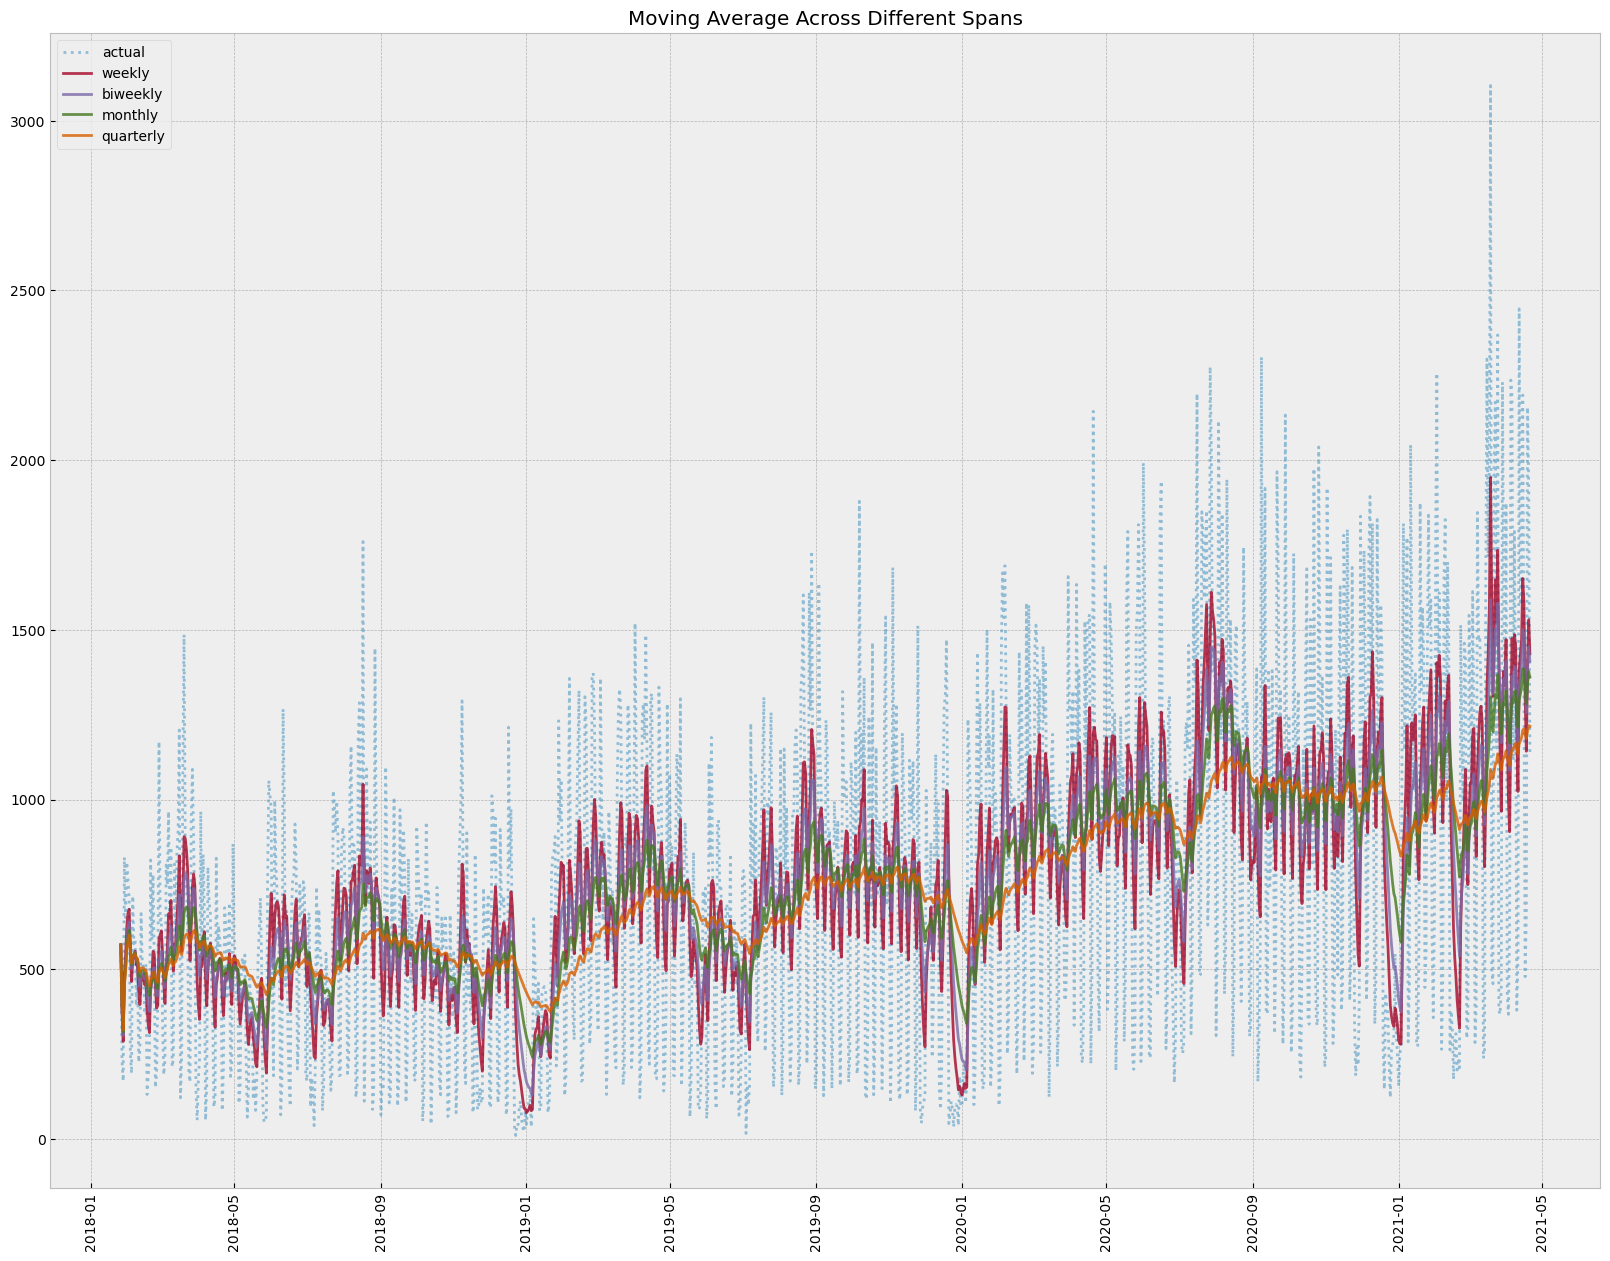

In [30]:
# lets look at a few different windows to see how these
# means compute
plt.figure(figsize=(20,15))
spans = [7,14,30,90]
labels = ['weekly', 'biweekly', 'monthly', 'quarterly']
plt.plot(page_counts, ls=':', alpha=0.5, label='actual')
for i, label in zip(spans, labels):
    plt.plot(page_counts.ewm(span=i).mean(),
             label=label, alpha=0.8)
plt.legend()
plt.title('Moving Average Across Different Spans')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# just like before when we were examining z scores,
# our goal here is to compute fences based on multiples of stand
# deviations.  We have a moving average with the ewm window,
# so lets use that now to compute a moving standard deviation fence.
# this is what we call the bollanger band

In [ ]:
# three pieces to compute our metric for moving outlier analysis:
# previously, we would use z-score, and would talk about if a z > abs(3),
# it may be considered anomalous.
# here, we are going to compute what we call %b, which is a ratio
# of where the value is sitting in relation to the scope of the bands
# since they move.  Let's see how to construct these bands,
# and how to calculate %b.

In [34]:
# lets go ahead and pick the monthly average as an anchor,
# so we will stick with a span of 30 for this analysis
span = 30 #(30 day moving average)
k = 3 # number of standard deviations out I want to put the bands
# note the resemblence to the 3 in z score assessment, this is not
#coincidental, we are going to see if things sit 3 standard deviations
# out from the moving average
midband = page_counts.ewm(span=span).mean()


In [35]:
# three standard devs up from the mid band will be our upper band
upper_band = midband + (k * page_counts.ewm(span=span).std())
# three standard devs down from the mid will be our lower band
lower_band = midband - (k * page_counts.ewm(span=span).std())


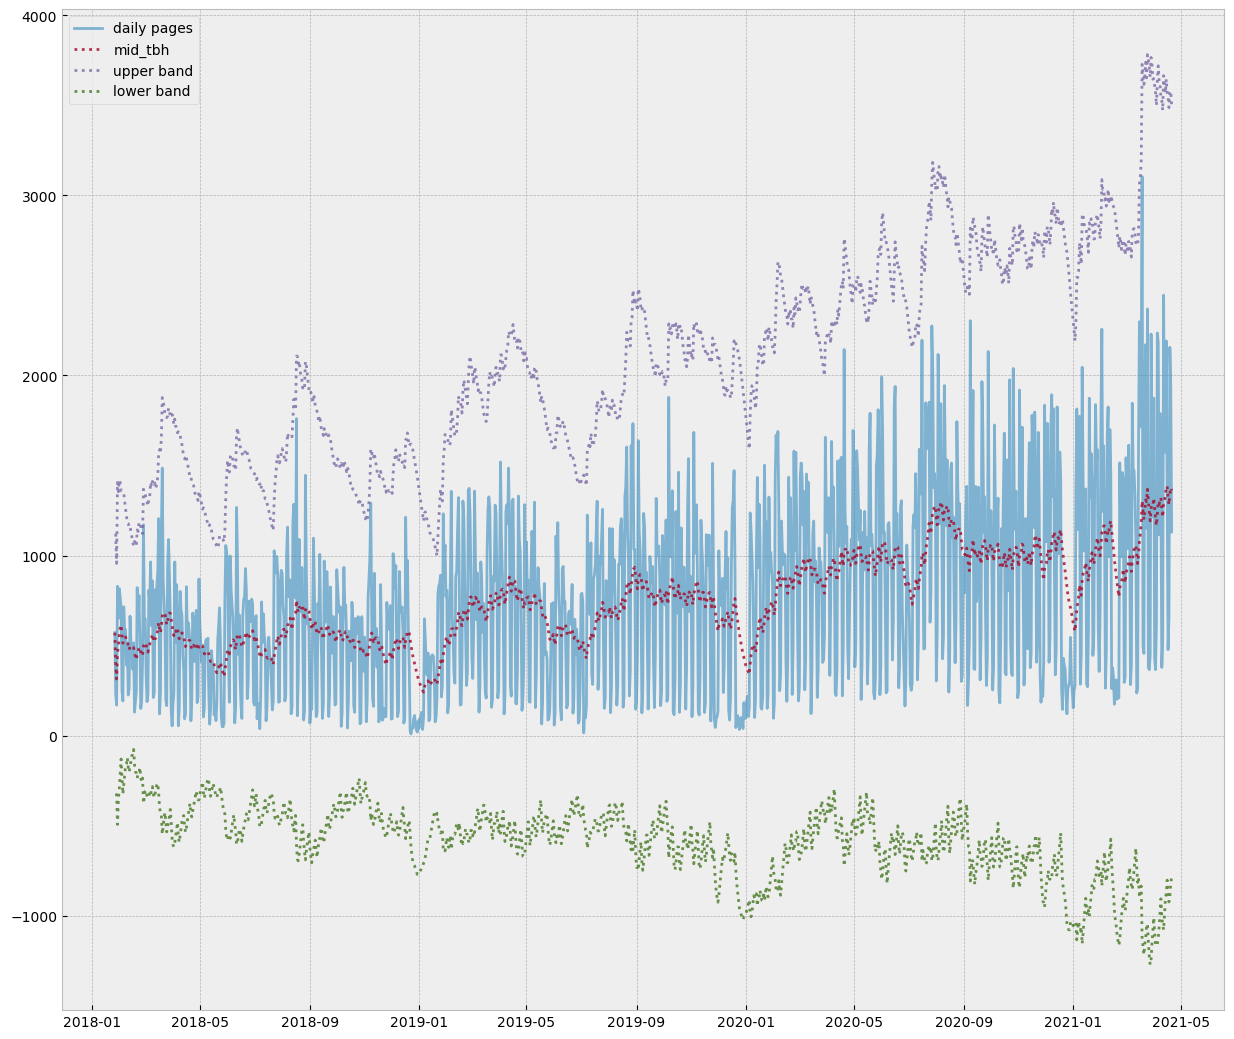

In [36]:
# lets visualize those:
plt.figure(figsize=(15,13))
plt.plot(page_counts, alpha=0.6, label='daily pages')
plt.plot(midband, alpha=0.8, ls=':', label='mid_tbh')
plt.plot(upper_band, alpha=0.8, ls=':', label='upper band')
plt.plot(lower_band, alpha=0.8, ls=':',label='lower band')
plt.legend()
plt.show()

In [ ]:
# percent b:
# (last_observed - lower_band) / (upper_band - lower_band)
# at the top, we could have upper - lower / upper-lower, which would be 1
# at the bottom, we would have lower-lower / upper-lower, which would be 0.
# we want to know values that are sitting above the value of 1, which
# would take us outside of that upper fence

In [ ]:
# calculate that percent b


In [37]:
bb_df = pd.concat([page_counts, upper_band, lower_band], axis=1)


In [38]:
bb_df.columns = ['observed', 'ub', 'lb']


In [39]:
bb_df.head()


,observed,ub,lb
date,,,
2018-01-26,572,NaN,NaN
2018-01-27,230,1120.791557,-330.191557
2018-01-28,170,956.773991,-326.494835
2018-01-29,830,1406.405897,-492.401124
2018-01-30,652,1354.808245,-352.070116


In [40]:
bb_df['prcnt_b'] = (bb_df['observed'] - bb_df['lb']) / (bb_df['ub'] - bb_df['lb'])


In [41]:
bb_df['prcnt_b']


date
2018-01-26         NaN
2018-01-27    0.386077
2018-01-28    0.386899
2018-01-29    0.696438
2018-01-30    0.588249
                ...   
2021-04-17    0.309197
2021-04-18    0.358655
2021-04-19    0.683232
2021-04-20    0.625600
2021-04-21    0.446246
Freq: D, Name: prcnt_b, Length: 1182, dtype: float64

In [42]:
bb_df[bb_df.prcnt_b > 0.8].shape


(21, 4)

In [43]:
page_counts.shape


(1182,)

# What If I want to see how individuals interact with the curriulum on a daily basis using these same tactics?

In [ ]:
# strategy:
# narrow down page hits on a user by user basis
# compute the ewm for that specific user
# calculate the bands
# calculate the percent b
# get instances where that user goes beyond 1 for percent b,
# capture those instances

In [ ]:
# few things I want to do here, and we will build them out with
# functions

In [ ]:
# If I want to look at one user,


In [44]:
df0[df0['user_id'] == 1]


,endpoint,user_id,cohort_id,source_ip
date,,,,
2018-01-26,/,1,8.0,97.105.19.61
2018-01-26,java-ii,1,8.0,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,javascript-i/functions,1,8.0,97.105.19.61
...,...,...,...,...
2021-04-21,python/dataframes,1,28.0,70.121.199.82
2021-04-21,/,1,28.0,70.121.199.82
2021-04-21,sql/mysql-overview,1,28.0,70.121.199.82


In [45]:
# create a function to prepare a df for analysis
# on the user by user basis:
def prep_user(df, user):
    '''
    will return a page count Series for a single user
    '''
    df_user = df[df.user_id == user]
    df_user.index = pd.to_datetime(df_user.index)
    return df_user['endpoint'].resample('D').count()

In [46]:
prep_user(df0, 1).head()


date
2018-01-26    7
2018-01-27    1
2018-01-28    0
2018-01-29    6
2018-01-30    5
Freq: D, Name: endpoint, dtype: int64

In [47]:
# lets build out the pieces to see percent b
# and return anomalies
def calculate_pb(user_series, span=30, k=3):
    midband = user_series.ewm(span=span).mean()
    upper_band = midband + (
        k * user_series.ewm(span=span).std())
    lower_band = midband - (
    k * user_series.ewm(span=span).std())
    bb_df_user = pd.DataFrame({
        'observed': user_series,
    'ub': upper_band,
    'lb': lower_band})
    bb_df_user['prcnt_b'] = (bb_df_user.observed - 
                             bb_df_user.lb) / (
    bb_df_user.ub - bb_df_user.lb)
    return bb_df_user

In [48]:
# steps so far:
user_series = prep_user(df0, 1)
calculate_pb(user_series)

,observed,ub,lb,prcnt_b
date,,,,
2018-01-26,7,NaN,NaN,NaN
2018-01-27,1,16.627922,-8.827922,0.386077
2018-01-28,0,13.712115,-8.687309,0.387836
2018-01-29,6,13.961213,-7.014487,0.620455
2018-01-30,5,13.002533,-5.361113,0.564219
...,...,...,...,...
2021-04-17,0,47.796135,-30.463580,0.389263
2021-04-18,8,46.473148,-29.226564,0.491766
2021-04-19,10,45.335193,-27.910969,0.517583


In [49]:
def grab_anomalies(bb_df):
    return bb_df[bb_df['prcnt_b'] >= 1]

In [50]:
sus = pd.DataFrame()
for usr in df0.user_id.unique():
    # resample page hits by the day for user:
    user_series = prep_user(df0, usr)
    # get the bollanger band df for that user:
    bb_user = calculate_pb(user_series)
    # establish that we have the username associated with this
    # specific analysis:
    bb_user['user_id'] = usr
    # grab any rows where that user is breaching the bands
    anomalies = grab_anomalies(bb_user)
    sus = pd.concat([sus, anomalies], axis=0)

In [51]:
sus[['observed', 'prcnt_b', 'user_id']]


,observed,prcnt_b,user_id
date,,,
2018-02-20,54,1.041590,1
2018-05-29,68,1.053309,1
2018-11-07,13,1.071605,1
2018-12-19,25,1.078369,1
2019-01-29,44,1.112436,1
...,...,...,...
2021-04-13,42,1.039813,884
2021-04-14,67,1.034721,888
2021-04-20,53,1.028833,919


In [52]:
sus[sus['user_id'] == 1]


,observed,ub,lb,prcnt_b,user_id
date,,,,,
2018-02-20,54,50.349000,-37.435509,1.041590,1
2018-05-29,68,62.374629,-43.149742,1.053309,1
2018-11-07,13,11.524503,-9.081619,1.071605,1
2018-12-19,25,22.002760,-16.242235,1.078369,1
2019-01-29,44,36.587343,-29.340675,1.112436,1
2019-07-08,101,83.899086,-67.401549,1.113026,1
2020-01-15,41,39.731193,-27.212529,1.018953,1
2021-01-05,40,35.348264,-27.246673,1.074315,1
2021-04-15,52,50.177299,-32.026781,1.022173,1


In [53]:
sus.sort_values('prcnt_b', ascending=False).head()


,observed,ub,lb,prcnt_b,user_id
date,,,,,
2020-05-12,16,13.026013,-10.961497,1.123981,93
2020-03-10,8,6.513006,-5.480748,1.123981,213
2020-09-13,4,3.256503,-2.740374,1.123981,210
2021-01-19,4,3.256503,-2.740374,1.123981,308
2020-12-24,1,0.814126,-0.685094,1.123981,232


In [54]:
sus.sort_values('observed', ascending=False).head()


,observed,ub,lb,prcnt_b,user_id
date,,,,,
2020-07-22,285,266.290617,-176.458698,1.042257,11
2019-03-03,272,232.200343,-182.757078,1.095913,341
2020-04-16,271,267.834945,-179.446120,1.007076,570
2019-07-25,253,222.709718,-153.311796,1.080555,422
2020-04-05,232,205.731770,-141.463837,1.075658,570
